# Exercise 0 : Import Libraries

In [132]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso


# Exercise 1 : Read the Dataset

In [46]:
df = pd.read_csv('heart_disease.csv')

# Exercise 2 : Drop Unnamed: 0 column

In [47]:
df.drop(['Unnamed: 0'] ,axis = 1, inplace=True)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [49]:
df.shape

(303, 14)

In [50]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,1.000000


In [51]:
df.columns.values


array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype=object)

In [52]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [53]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

# Exercise 4 : Handle missing data

In [64]:
df.drop(df[df['ca']=='?'].index,inplace=True)
df['thal'].replace('?','3.0',inplace=True) # mode of the column

# Exercise 5 : Handle Features

- Use one method between these two methods for the object type columns :-
    1. Convert data type to numeric.
    2. One hot encoding.

In [65]:
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

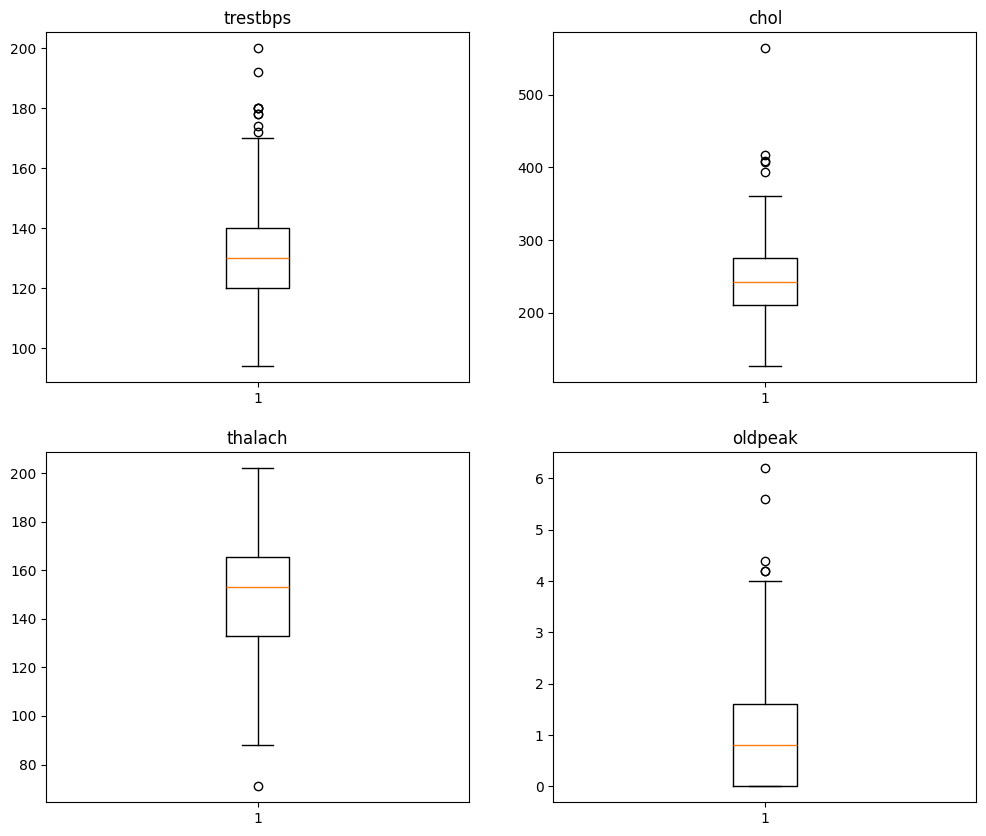

In [68]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].boxplot(df['trestbps'])
axs[0, 0].set_title('trestbps')

axs[0, 1].boxplot(df['chol'])
axs[0, 1].set_title('chol')

axs[1, 0].boxplot(df['thalach'])
axs[1, 0].set_title('thalach')

axs[1, 1].boxplot(df['oldpeak'])
axs[1, 1].set_title('oldpeak')

plt.show()

In [69]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['trestbps'] < low_limit) | (df['trestbps'] > high_limit)]
df = df.drop(outliers.index)

Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['chol'] < low_limit) | (df['chol'] > high_limit)]
df = df.drop(outliers.index)

Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['oldpeak'] < low_limit) | (df['oldpeak'] > high_limit)]
df = df.drop(outliers.index)

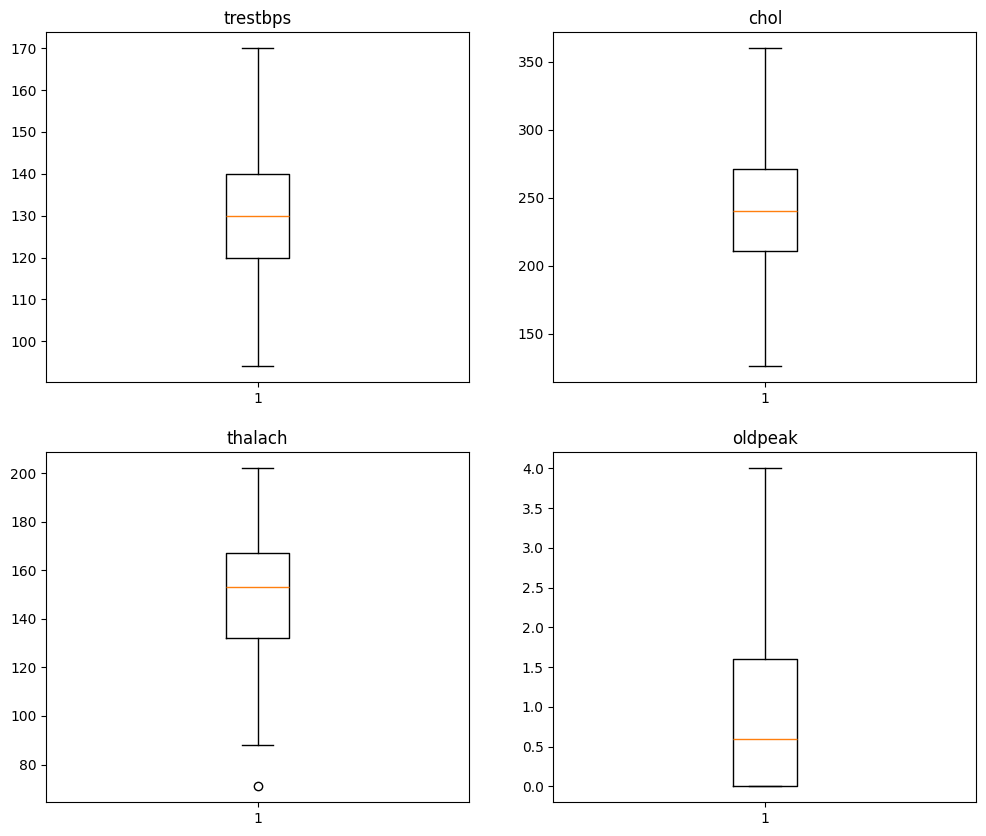

In [70]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].boxplot(df['trestbps'])
axs[0, 0].set_title('trestbps')

axs[0, 1].boxplot(df['chol'])
axs[0, 1].set_title('chol')

axs[1, 0].boxplot(df['thalach'])
axs[1, 0].set_title('thalach')

axs[1, 1].boxplot(df['oldpeak'])
axs[1, 1].set_title('oldpeak')

plt.show()

# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

In [86]:
df.corr().abs()
#there is no values above threshold

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
age,1.000000,0.057884,0.102067,0.288118,0.165863,0.114130,0.138111,0.415400,0.092112,0.199464,0.146717,0.382280,0.118847,0.231842
sex,0.057884,1.000000,0.055512,0.005764,0.126102,0.065576,0.050147,0.055732,0.186552,0.170311,0.068014,0.131285,0.412608,0.319271
cp,0.102067,0.055512,1.000000,0.066185,0.051712,0.057747,0.076613,0.330971,0.369853,0.191974,0.139547,0.215388,0.281590,0.404287
trestbps,0.288118,0.005764,0.066185,1.000000,0.126993,0.126110,0.159830,0.062631,0.000065,0.141282,0.079008,0.099914,0.102393,0.121680
chol,0.165863,0.126102,0.051712,0.126993,1.000000,0.006982,0.124137,0.009519,0.067440,0.021402,0.050188,0.116037,0.014669,0.102822
fbs,0.114130,0.065576,0.057747,0.126110,0.006982,1.000000,0.058829,0.014235,0.007796,0.020495,0.062827,0.157768,0.036096,0.010606
restecg,0.138111,0.050147,0.076613,0.159830,0.124137,0.058829,1.000000,0.095667,0.104301,0.096207,0.118500,0.123156,0.002302,0.166933
thalach,0.415400,0.055732,0.330971,0.062631,0.009519,0.014235,0.095667,1.000000,0.370088,0.333581,0.373360,0.281072,0.286688,0.421231
exang,0.092112,0.186552,0.369853,0.000065,0.067440,0.007796,0.104301,0.370088,1.000000,0.321836,0.255599,0.157746,0.339717,0.416734
oldpeak,0.199464,0.170311,0.191974,0.141282,0.021402,0.020495,0.096207,0.333581,0.321836,1.000000,0.528644,0.240631,0.318489,0.428550


# Exercise 8 : X and Y split, then train and test split

In [126]:
X = df.drop('present',axis=1)
y = df['present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 99)


# Exercise 9 : Train the model

In [127]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

In [128]:
y_test.value_counts()

present
0    29
1    28
Name: count, dtype: int64

In [129]:
y_pred = logmodel.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
sensitivity_specificity = sensitivity / specificity
auc_roc = roc_auc_score(y_test, y_pred)


In [130]:
print(f' Accuracy of the testing model: {accuracy_score(y_test, y_pred)}')
print(f' Sensitivity of the testing model: {sensitivity}')
print(f' Specificity of the testing model: {specificity}')
print(f' Sensitivity/Specificity of the testing model: {sensitivity_specificity}')
print(f' AUC-ROC of the testing model: {auc_roc}')


 Accuracy of the testing model: 0.7543859649122807
 Sensitivity of the testing model: 0.6071428571428571
 Specificity of the testing model: 0.896551724137931
 Sensitivity/Specificity of the testing model: 0.6771978021978021
 AUC-ROC of the testing model: 0.7518472906403941


# Exercise 11 : Find the wights and y intercept

In [131]:
w = logmodel.coef_
b = logmodel.intercept_
print(f'Wight: {w} \n intercept: {b}')

Wight: [[-0.05777363  1.07913308  0.52459521  0.02835934  0.0058092  -0.37016843
   0.15111573 -0.0517492   0.64389566  0.57109368  0.00467525  0.96459891
   0.39931199]] 
 intercept: [-0.15593486]


# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).